# Introdução
## **Video Games Sales Dataset**

### **TP Final - ICD 2022/1**


**Integrantes:**


*   Diógenes Vaz de Melo Oliveira
*   Raphaela Maria Costa e Silva 
*   Luiz Paulo Santos Ribeiro
*   Vivianne Basílio Barbosa (não participou)

As perguntas que, o grupo propôs a responder foram:

* Há viés de gênero na popularidade dos jogos em plataformas distintas?
* Algum gênero sofreu uma grande variância em popularidade com o tempo?
* Há viés de gênero nas vendas dos jogos em diferentes regiões?
* Conseguimos prever, a partir do Gênero e Publisher, se um jogo terá vendido mais no Japão que no resntante de todo o Mundo?

A base também pode ser encontrada nesse [link](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?resource=download&select=Video_Games_Sales_as_at_22_Dec_2016.csv).

# Motivação
A nossa motivação para esse trabalho é analisar as tendencias da industria de games de forma a entender principalmente as relações entre genero, vendas e publishers. O estudo dessas tendencias se faz importante pois a industria de games é muito grande, superando, em termos de vendas, outras grandes industrias do entretenimento como o cinema e a musica.

# Descrição da base

A base de dados escolhida pelo grupo conta com informações a respeito da venda de jogos eletrônicos, em todo o mundo, até dezembro de 2016. Ao todo, são 16.719 registros e dezesseis colunas:

* Name - nome do jogo (string)
* Platform - plataforma / console (string)
* Year_of_Release - ano de lançamento (int)
* Genre - gênero do jogo (string)
* Publisher -	empresa publicadora do jogo (string)
* NA_Sales - quantidade de vendas na América do Norte (float)
* EU_Sales - quantidade de vendas na Europa (float)
* JP_Sales - quantidade de vendas no Japão (float)
* Other_Sales -	vendas no restante do Mundo (float)
* Global_Sales - vendas totais em todo o Mundo (float)
* Critic_Score - (float)
* Critic_Count - (int)
* User_Score - (int)
* User_Count - (int)
* Developer -	empresa desenvolvedora do jogo (string)
* Rating - (char)

# Metodologia

Discutimos a metodologia usada em cada questão individualmente

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from collections import Counter


# Lê Base de Dados

In [ ]:
# Coloquem uma copia no Google Drive de vocês para rodar, só carregando no banco
# deleta o arquivo apos a execução e precisaria baixar de novo

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesvazmelo/TP-Introducao_Ciencia_de_Dados/main/Database/Video_Games_Sales_as_at_22_Dec_2016.csv',
                 sep=',',
                 header=0,
                 )
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Funções Auxiliares

# Pré-processamento



In [ ]:
# Remove colunas irrelevantes para a analize
df = df[['Name', 	'Platform', 	'Year_of_Release', 	'Genre', 	'Publisher', 	'NA_Sales', 	'EU_Sales', 	'JP_Sales', 	'Other_Sales', 	'Global_Sales']]
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

As colunas Year of Release, Publisher, Critic_Score, Critic_Count, User_score, User_Count, Developer e Rating tem valores nulos que vão deixados de lado


In [ ]:
df = df.dropna() # remove dados incompletos
df = df[df['Year_of_Release'] <= 2016] # remove dados parciais que não são pertinentes a analise
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

# Análise Exploratória

Vamos ver as métricas básicas do dataframe

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16412.000000,16412.000000,16412.000000,16412.000000,16412.000000,16412.000000
mean,2006.487144,0.264177,0.146069,0.078638,0.047680,0.536818
std,5.879201,0.819120,0.507191,0.311385,0.188178,1.560058
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000


Abaixo é possível ver o número de títulos para cada plataforma. As plataformas de ps2 e DS possuem pelo menos um quarto a mais de títulos do que qualquer outra plataforma.

Text(0, 0.5, 'Plataforma')

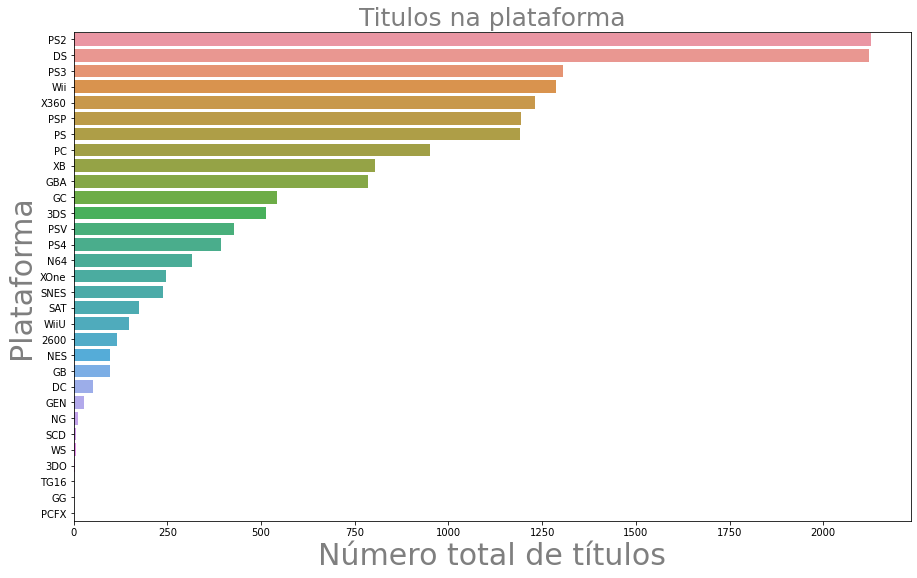

In [ ]:
platform_title = df.Platform.value_counts()

plt.subplots(figsize=(15,9))
ax = sbn.barplot(x=platform_title , y=platform_title .index)
ax.set_title('Titulos na plataforma', alpha=0.5, size=25)
ax.set_xlabel('Número total de títulos', alpha=0.5, size=30)
ax.set_ylabel('Plataforma', alpha=0.5, size=30)

O gráfico abaixo mostra a distribuição do número de jogos ao longo dos anos. A maioria dos jogos foram vendidos de 2005 a 2015 e as vendas na America do norte superam as vendas em outras regiões.

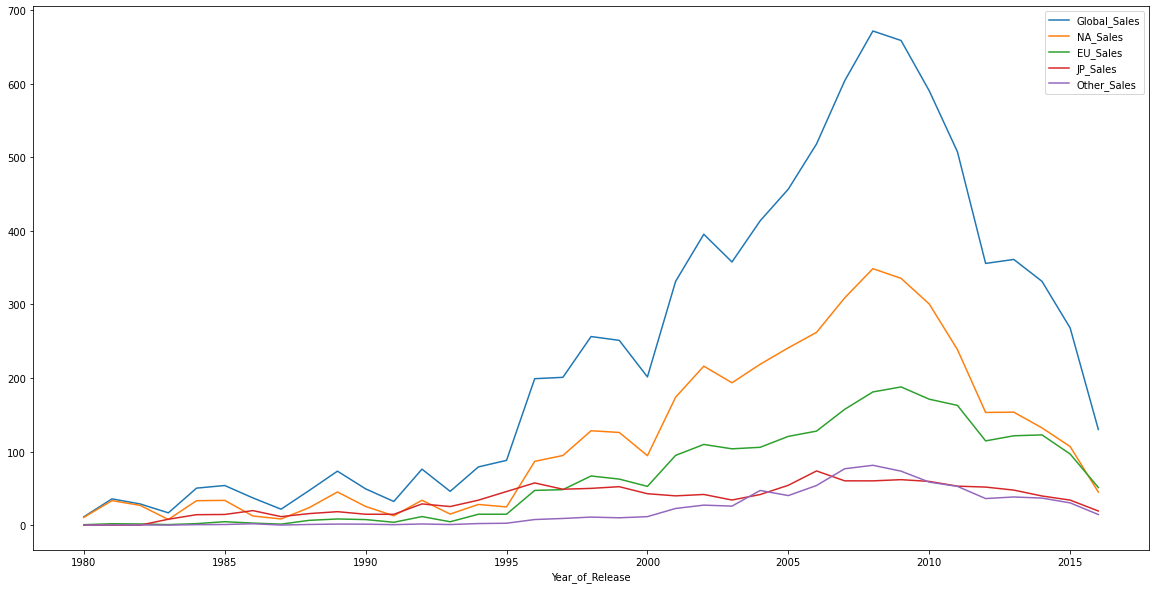

In [ ]:
vendas = df.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
vendas = vendas.query('Year_of_Release >0')
vendas.plot(figsize = (20,10))

Olhando o gráfico abaixo é possível ver que em geral são lançados mais jogos de ação e esportes do que de outros generos.


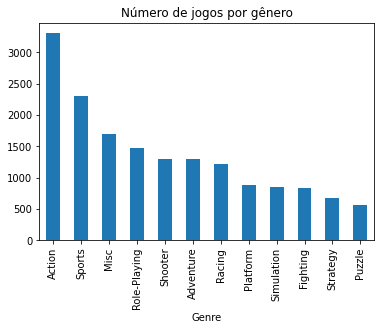

In [ ]:
df_copia = df[['Name','Genre']].copy()
df_copia = df_copia.groupby(['Genre']).count()
df_copia = df_copia['Name']
df_copia = df_copia.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df_copia.plot.bar()

Abaixo segue o gráfico dos generos da publisher Nintendo, que diferente da média global vista acima, possui mais jogos dos generos Plataform, Role-Playing e Misc.

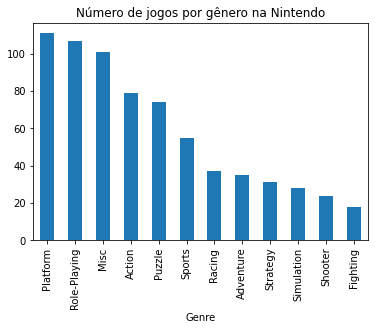

In [ ]:
df_copia = df.copy()
df_copia = pd.DataFrame(df_copia, columns=["Year","Genre","Name","Publisher"])
df_copia = df_copia.query('Publisher == "Nintendo"')
df_copia = df_copia.groupby(['Genre']).count()
df_copia = df_copia['Name']
df_copia = df_copia.sort_values(ascending=False)
plt.title('Número de jogos por gênero na Nintendo')
df_copia.plot.bar()

Abaixo é possível ver para cada região as maiores vendas de cara genero.

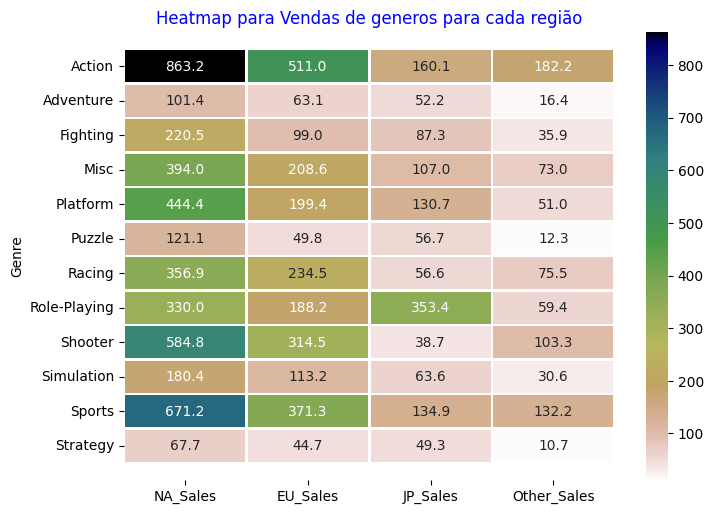

In [ ]:
genre_heatmap = df.groupby(by= 'Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.figure(figsize= [8,6], dpi= 99)

ax = sbn.heatmap(genre_heatmap, annot= True, fmt= '.1f', linecolor= 'white', linewidths= 1.2, cmap= 'gist_earth_r')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

plt.title('Heatmap para Vendas de generos para cada região', color= 'blue')
plt.show()

Abaixo é possível ver as vendas totais das publishers, com a Nintendo e a EA com as maiores quantidades de vendas.

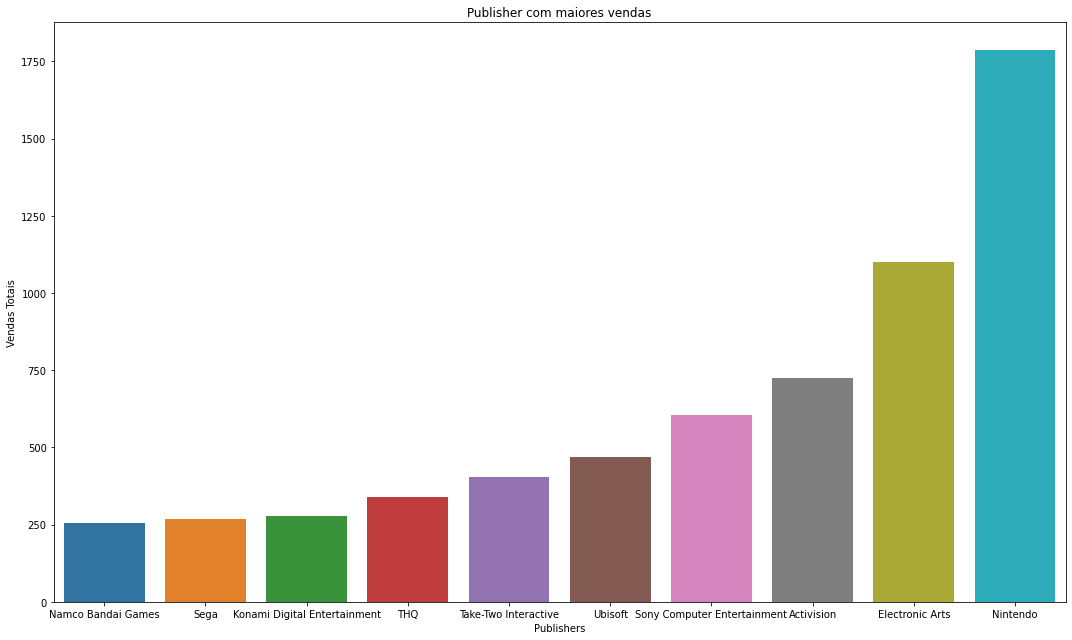

In [ ]:
vendas_publisher = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=True)
plt.figure(figsize=(15, 9))
sbn.barplot(
    x=vendas_publisher.iloc[-10:].index, 
    y=vendas_publisher.iloc[-10:].values,
    )
plt.title('Publisher com maiores vendas')
plt.xlabel('Publishers')
plt.ylabel('Vendas Totais')
plt.tight_layout()




Número total de videogames publicados por gênero (1980-2016)



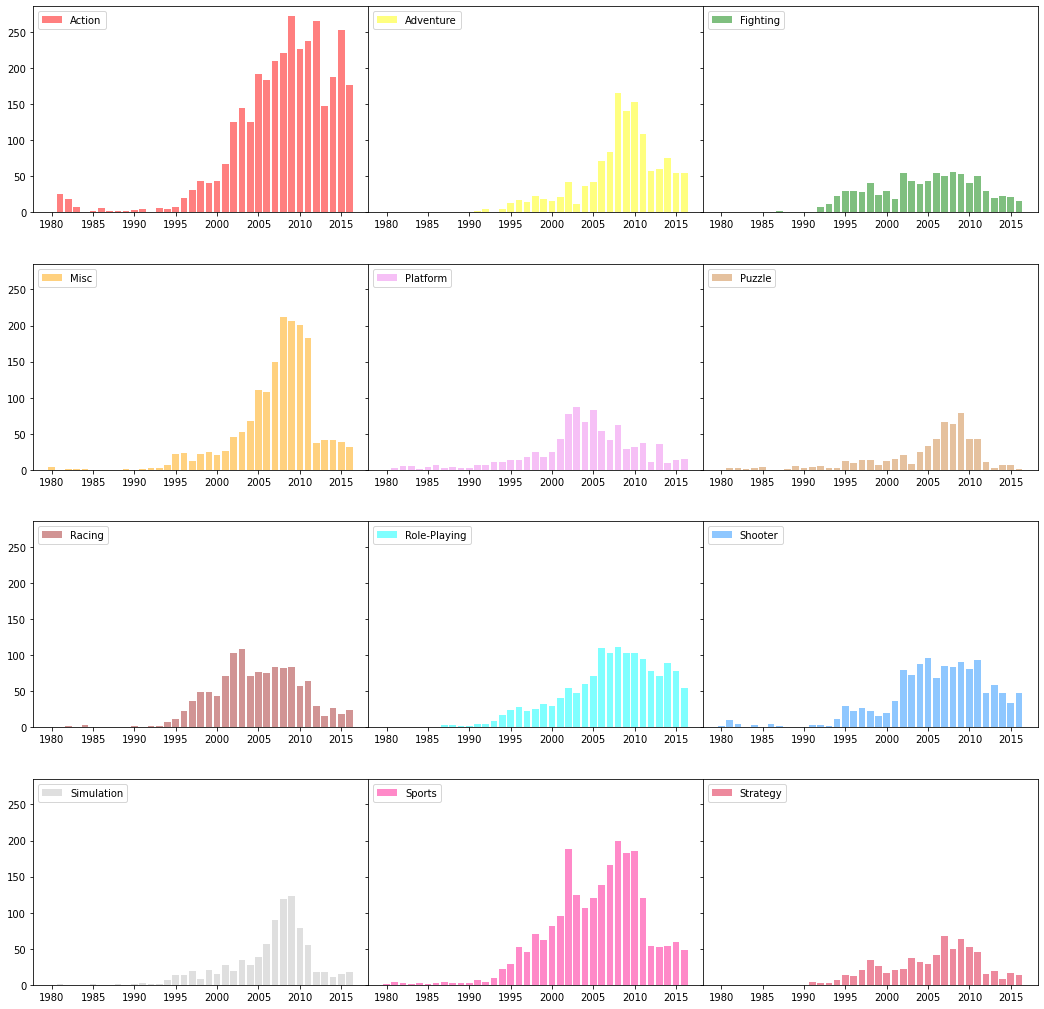

In [ ]:
res = pd.crosstab(df['Year_of_Release'], df['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=True)
colors_genre = ['red','yellow', 'green', 'orange','violet', 'peru', 
          'brown', 'cyan','dodgerblue','silver','deeppink','crimson']
for i in range(4):
    for j in range(3):
        genre_rec = res.iloc[:, i*3+j]
        axes[i, j].bar(genre_rec.index, genre_rec.values, label=genre_rec.name, 
                       color=colors_genre[i*3+j], alpha=0.5)
        axes[i, j].legend(loc='upper left')
fig.subplots_adjust(hspace=0.25, wspace=0)

As 10 principais plataformas baseadas em vendas de videogames por país

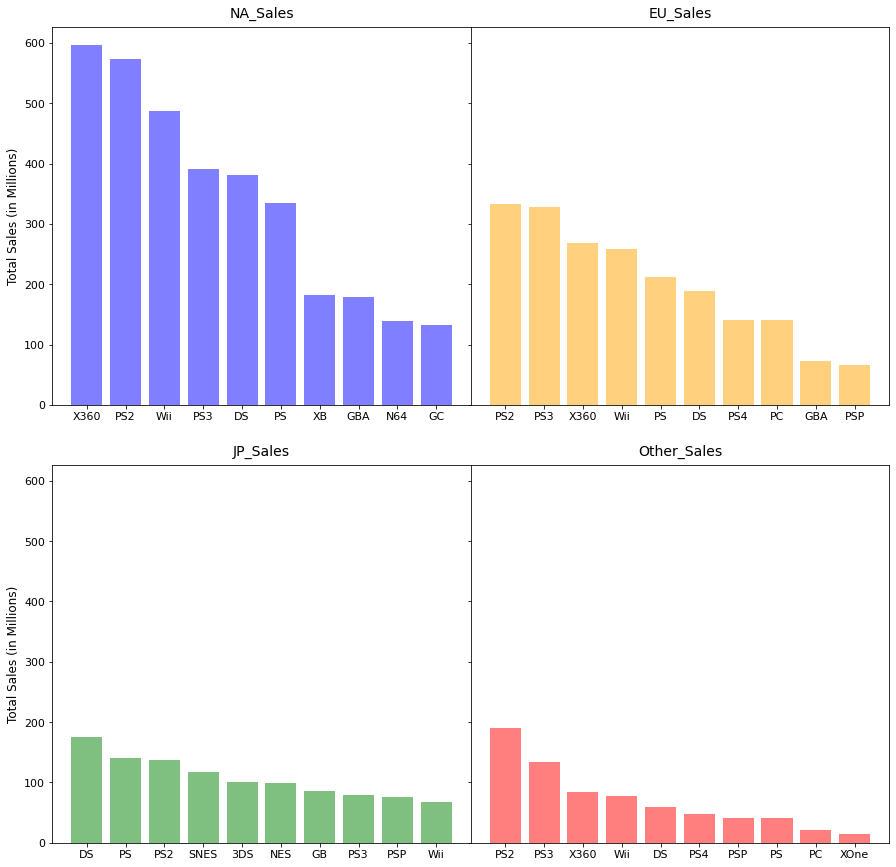

In [ ]:
grouped = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 
                                        'JP_Sales', 'Other_Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
colors_region = ['blue', 'orange', 'green', 'red']
for i in range(2):
    for j in range(2):
        idx = i*2+j
        rec = res.iloc[idx, :].sort_values(ascending=False)[:10]
        axes[i, j].bar(rec.index, rec.values, color=colors_region[idx], alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=14, y=1.01)
        if idx % 2 == 0:
            axes[i, j].set_ylabel('Total Sales (in Millions)', fontsize=12)
        axes[i, j].tick_params(axis='x', labelsize=11)
        axes[i, j].tick_params(axis='y', labelsize=11)
fig.subplots_adjust(hspace=0.16, wspace=0)

# Perguntas

## Há viés de gênero na popularidade dos jogos em plataformas distintas?

Vamos criar um novo dataframe, com os dados de vendas agrupados por plataforma e pelos dois gêneros mais vendidos globalmente(esportes e ação):

In [ ]:
data_platform = df.groupby(by=['Platform','Genre'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
print(data_platform.query)

<bound method DataFrame.query of     Platform       Genre  Global_Sales
153      PS3      Action        297.83
244      Wii      Sports        286.54
266     X360     Shooter        275.67
141      PS2      Action        272.43
151      PS2      Sports        262.64
..       ...         ...           ...
170      PS4      Puzzle          0.03
11       3DO      Puzzle          0.02
115       NG      Sports          0.02
231     TG16     Shooter          0.02
12       3DO  Simulation          0.02

[293 rows x 3 columns]>


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

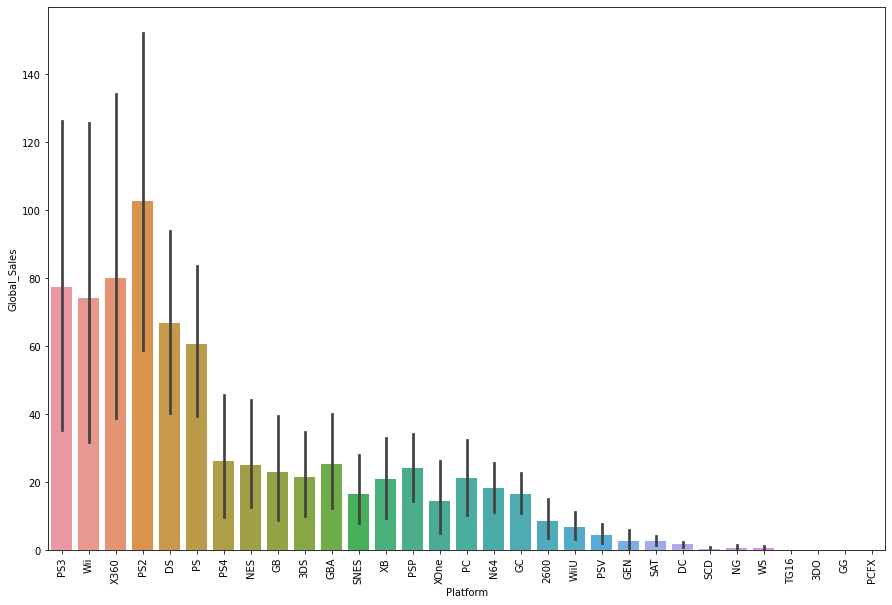

In [ ]:
plt.figure(figsize=(15, 10))
sbn.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

Para responder a pergunta foi feito um teste de hipóteses, em que a hipotese nula é que não há vies, ou seja, a variação das vendas de um genero em diferentes plataformas pode ser explicada por aleatoriedade.
Isso foi feito usando um bootstrap com nível de confiança de 95%. Para fazer as comparações foram feitos dois bootstraps para cada plataforma dado um genero, um usando a população sem a plataforma p para um dado genero g e um para essa plataforma para um dado genero g.
Foram testados os generos mais vendidos globalmente, ação e esportes.


In [ ]:
def bootstrap(n_sub, data1, data2):
  values = np.zeros(n_sub)
  values2 = np.zeros(n_sub)
  data = np.zeros(data1.size)
  data0 = np.zeros(data2.size)
  for i in range(n_sub):
    # replace=TRUE garanta amostras com reposição
    random_state=i #garante replicabilidade do experimento
    sample = data_platform.sample(data1.size, replace=True, random_state=i) 
    sample0 = data_platform.sample(data2.size, replace=True, random_state=i) 

    # Medina como estatistica
    values[i] = sample["Global_Sales"].mean()
    values2[i] = sample0["Global_Sales"].mean()

  # Gerando valores inferior e superior para um nível de confiança de 99%
  LI = np.percentile(values, 0.5)
  LS = np.percentile(values, 99.5)
  LI0 = np.percentile(values2, 0.5)
  LS1 = np.percentile(values2, 99.5)
  return LI0,LS1, LI, LS



In [ ]:
def results(g_local, g_global):

  low0,high0, low, high = bootstrap(1000, g_local, g_global)
  print("Resultado inferior sem a plataforma:",low0)
  print("Resultado inferior com a plataforma:",low)
  print("Resultado superior sem a plataforma:",high0)
  print("Resultado superior com a plataforma:",high)

  if (high> high0 or low < low0 or np.isnan(low)):
    if(high> high0):
      print('Result: vendas na plataforma acima do esperado, 99% de chance de apresentar um viés')
    else:
      print('Result: vendas na plataforma abaixo do esperado, 99% de chance de apresentar um viés')
  else:
    print('Result: Variação dentro do esperado')
  

In [ ]:
genre = ['Action', 'Sports']
platform = ['PS2', 'DS', 'PS3', 'X360', 'Wii', 'PS', 'PSP', '3DS', 'PC', 'XB',
       'GBA', 'PSV', 'PS4', 'GC', 'XOne', 'N64', 'WiiU', '2600', 'SNES',
       'SAT', 'NES', 'GB', 'DC', 'NG', 'GEN', 'WS', 'SCD']

for p in platform:
  v_local = df[['Platform','Genre', 'Global_Sales']]
  v_local = v_local.query('Platform == @p')


  v_global = df[['Platform','Genre', 'Global_Sales']]
  v_global = v_global.query("Platform != @p")
    
  for g in genre:
    g_local = v_local[v_local['Genre'] == g]
    g_global = v_global[v_global['Genre'] == g]

    print('Genre: ', g, '\Platform: ' , p)
    results(g_local, g_global)
    print()

Genre:  Action \Platform:  PS2
Resultado inferior sem a plataforma: 28.821836113925478
Resultado inferior com a plataforma: 26.280220772946862
Resultado superior sem a plataforma: 31.415737110210515
Resultado superior com a plataforma: 34.0574684057971
Result: vendas na plataforma acima do esperado, 99% de chance de apresentar um viés

Genre:  Sports \Platform:  PS2
Resultado inferior sem a plataforma: 28.55425979982593
Resultado inferior com a plataforma: 26.66294194373402
Resultado superior sem a plataforma: 31.71863158398607
Resultado superior com a plataforma: 33.958509803921565
Result: vendas na plataforma acima do esperado, 99% de chance de apresentar um viés

Genre:  Action \Platform:  DS
Resultado inferior sem a plataforma: 28.823882604552082
Resultado inferior com a plataforma: 26.40572877877878
Resultado superior sem a plataforma: 31.426475821280413
Resultado superior com a plataforma: 34.28642737737738
Result: vendas na plataforma acima do esperado, 99% de chance de apresent

Olhando os resultados acima, é perceptível que há vies de gênero na popularidade dos jogos em plataformas distintas, e que as vendas dos generos não podem ser explicadas por aleatoriedade. Consequentemente, a hipotese nula pode ser rejeitada. 

Também é possível concluir que a maior parte das plataformas tem vendas dos generos de ação e esportes acima do esperado. No entando, algumas plataformas não tiveram vendas desses generos, e o resultado foi não numérico, o que pode ser considerado como 0 (visto que não houveram vendas desse genero em algumas plataformas), então o resultado foi dado como abaixo do esperado.

## Algum gênero sofreu uma grande variância em popularidade com o tempo?

Aqui queremos fazer uma simples visualização de dados, mostrando a variação de cada genero como uma fração das vendas globais ao longo do tempo. Embora o dataframe utilizado não apresente um separação de vendas por ano, podemos estrapolar que a maior parte das vendas de um jogo ocorre logo apos seu lançamento, uma vez que jogos mais velhos se tornam tecnologicamente defazados e perdem grande parte de sua atratividade.

Assim, usamos o ano de lançamento como uma estrapolação das vendas naquele ano, apesar dessas vendas se extenderem por mais algum tempo. Esse problema, porém se acentua em jogos de generos menos populares, uma vez que haverá anos em que não haverá novos lançamentos para um publico de nicho, portanto usaremos apenas os 2 generos com mais jogos lançados para a analise.

Separamos também a analise considerendo a prevalencia de cada genero tanto nos mercados regionais quanto no mercado global de jodos.

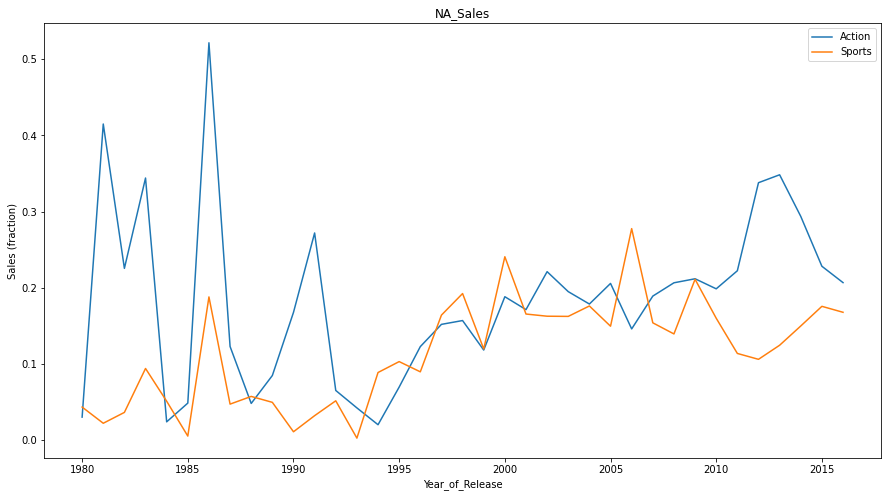

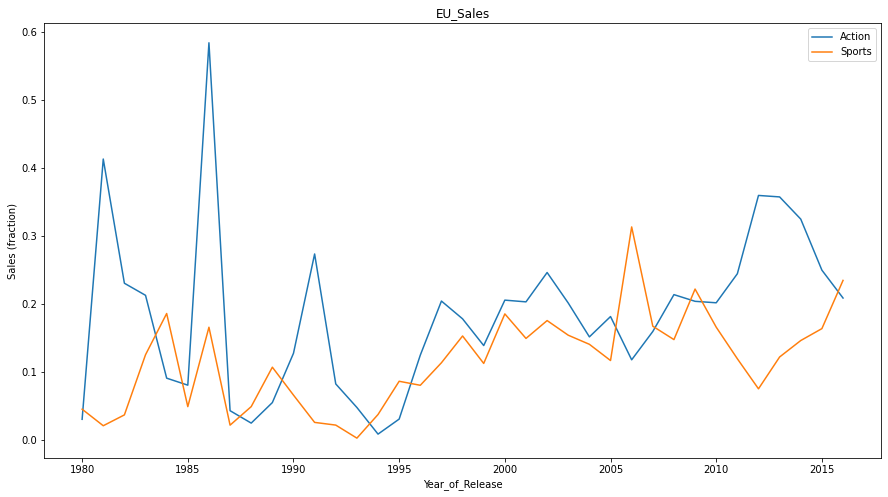

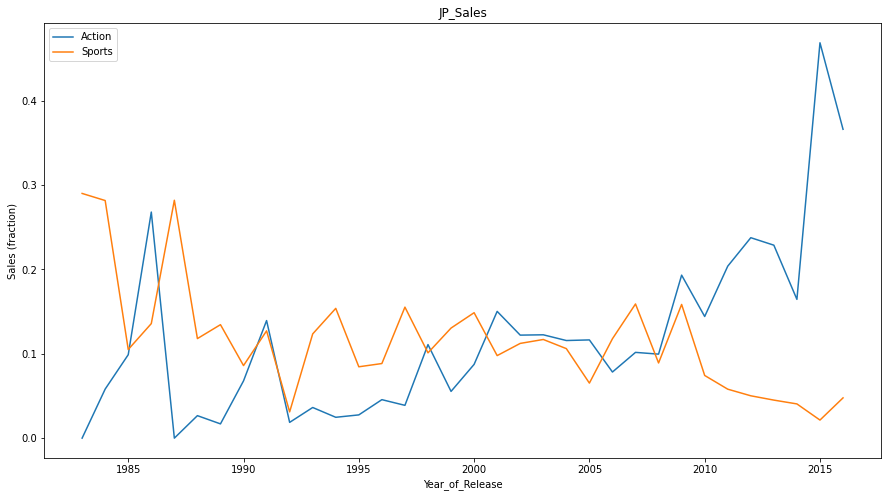

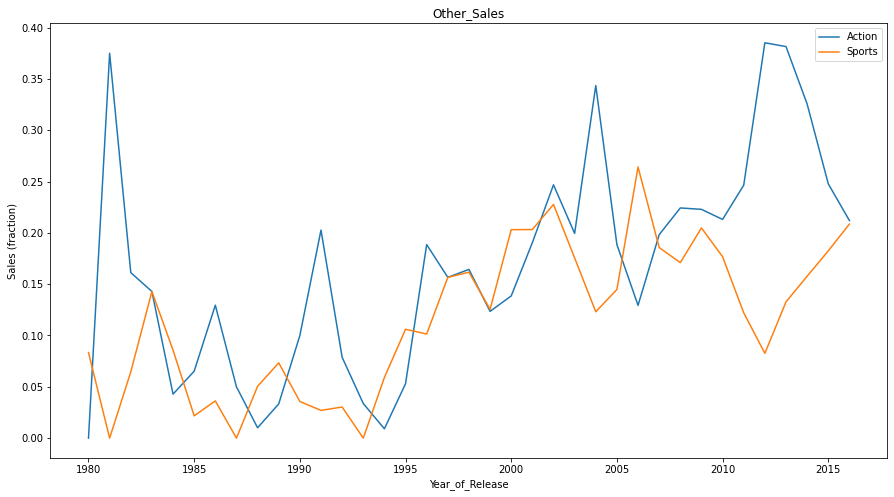

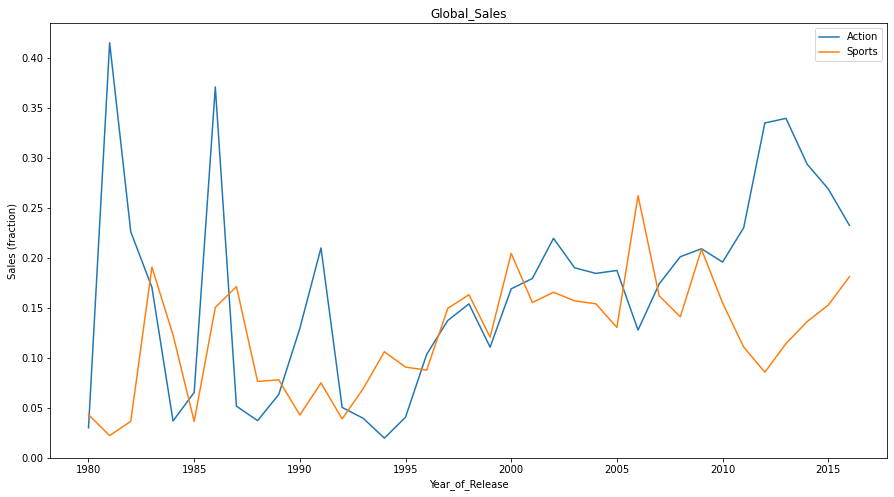

In [ ]:
genre = ['Action', 'Sports']
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for r in region:
  data = df[['Year_of_Release', r]].groupby('Year_of_Release').sum().copy()

  for g in genre:
    temp = df[df['Genre'] == g].copy()
    data[g] = temp[['Year_of_Release', r]].groupby('Year_of_Release').sum()
    data[g] = data[g] / data[r]
  
  data.plot(y=genre, title=r, figsize=(15,8), ylabel='Sales (fraction)')

Com isso, podemos observar diferentes tendencia entre as regiões. Por exemplo, apesar de todas as regiões apresentarem uma queda nas vendas de jogos de esportes lançados por volta de 2012, o mercado japones apresentava uma queda mais antiga, da qual não mostra sinais de recuperação até 2016. Ou como apenas o agregado das regiões Other_Sales possui um pico de vendas de um jogo de ação em torno de 2004 que não é visto em nenhuma das outras regiões


Agora, vamos ver o mesmo gráfico, incluindo todos os gêneros, só por farra. Como dessa vez serão usados muito mais dados, consideramos que um plot simples tornaria a comparação entre linhas um tanto confuso, especialmente em relação a jogos cujo gênero possui um nicho mais específico, uma vez que esse sempre iram compor valores pequenos das vendas totais.

Por isso, para plotar todos os generos num unico grafico, optamos por usar um plot de area. Esse plot funciona bem nesta situação dado que estamos visualizando a composição das vendas de jogos lançados num dado ano, e por isso, a soma de todos devera resultar em 1 unidade (100%) das vendas naquele ano.

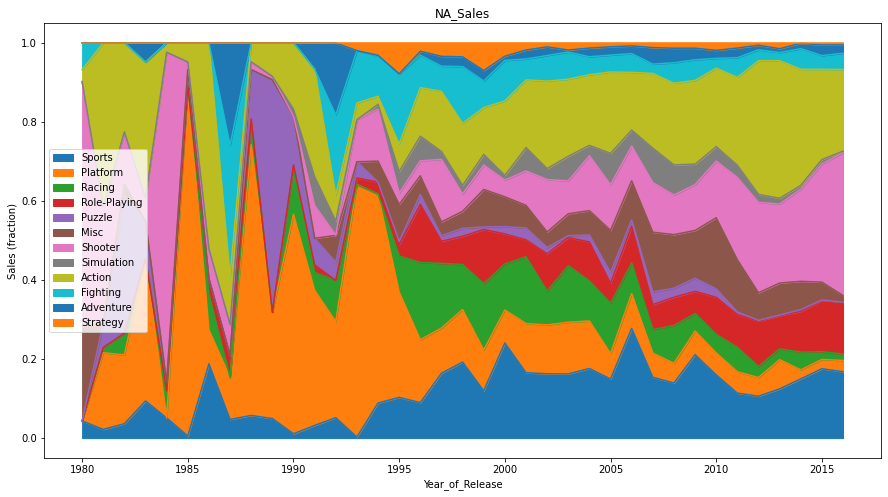

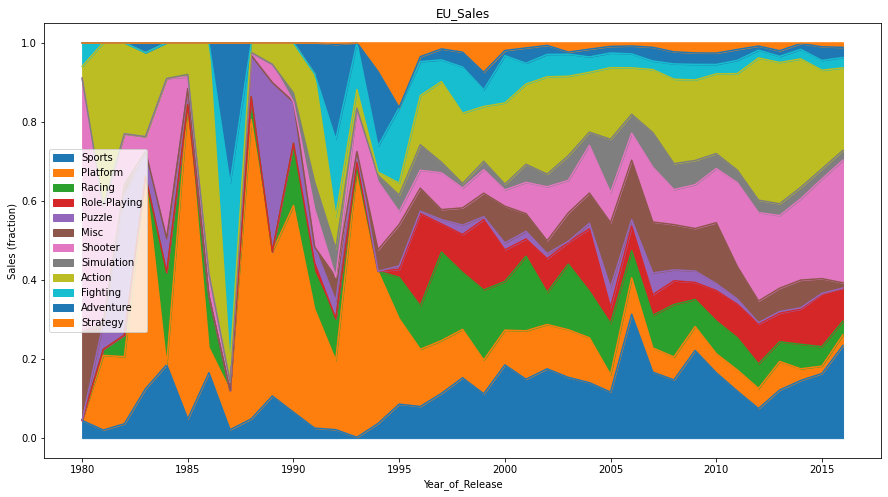

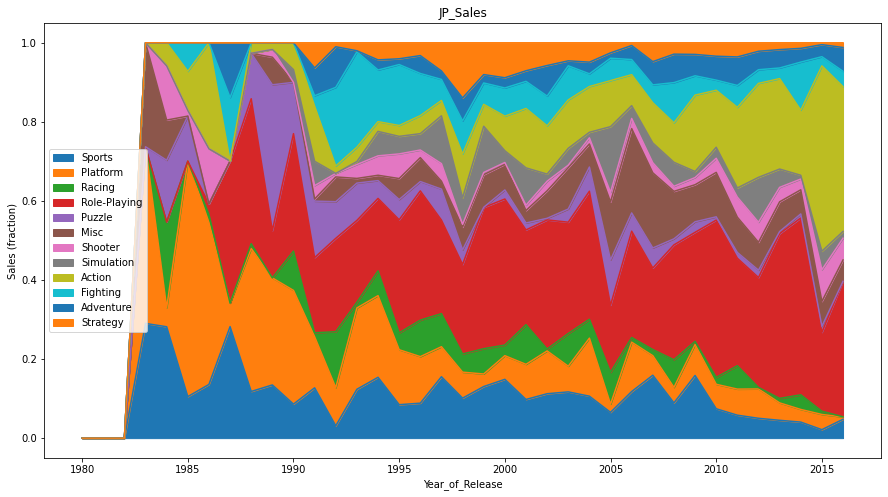

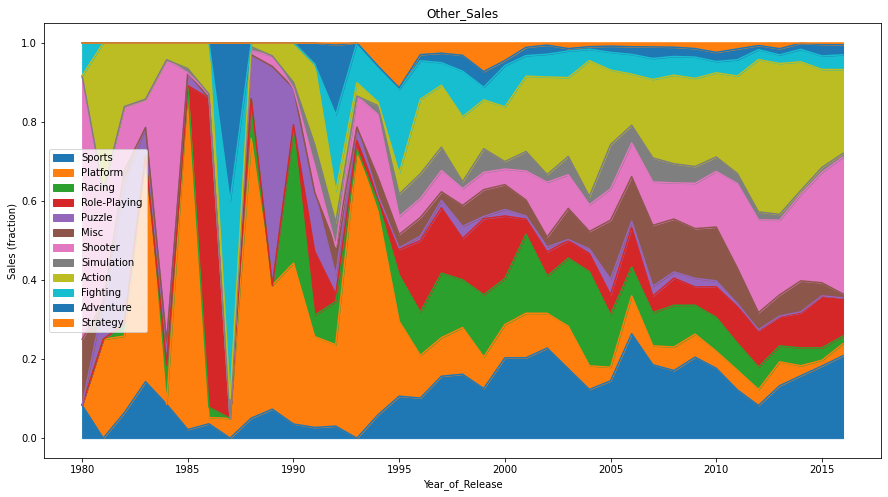

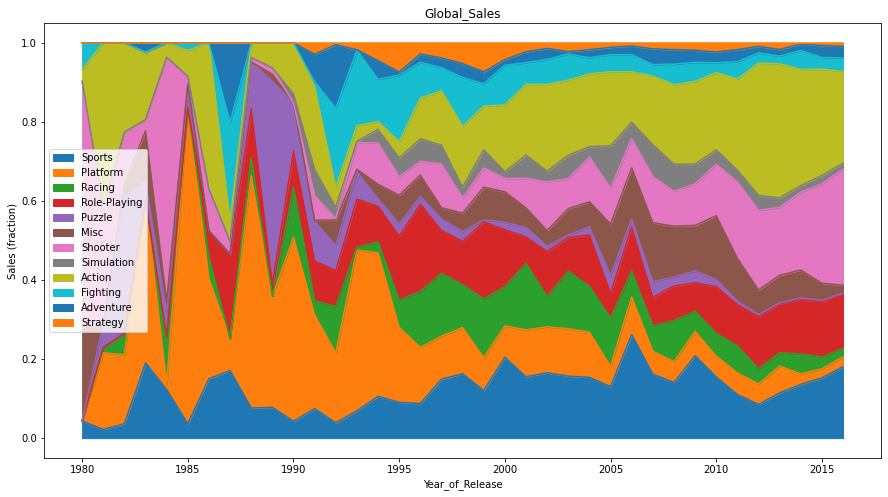

In [ ]:
genre = df['Genre'].unique()
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for r in region:
  data = df[['Year_of_Release', r]].groupby('Year_of_Release').sum().copy()

  for g in genre:
    temp = df[df['Genre'] == g].copy()
    data[g] = temp[['Year_of_Release', r]].groupby('Year_of_Release').sum()
    data[g] = data[g] / data[r]
  
  data.plot(kind='area',y=genre, title=r, figsize=(15,8), ylabel='Sales (fraction)')
  plt.legend(loc='center left')
  plt.show()

Por algum motivo além da minha compreenção, o pandas ordena a legenda na ordem contraria a posição da area no grafico. E foi necessário fixar a legenda para evitar que regiões diferentes mativessem a mesma formatação

## Há viés de gênero nas vendas de jogos em diferentes regiões?

Dado um espaço amostral mais restrito para certos gêneros, testaremos apenas os 2 gêneros com mais jogos lançados globalmente: Ação e Esportes.

Para testar a hipótese, vamos formular um hipotese nula de que a variação de venda de um genero em diferentes regiões pode ser explicada como sendo fruto do acaso. Assim, verificaremos se **p** regional é igual a **p** global removida a região de análise, sendo **p** a proporção de vendas de um dado genero. Ou seja:

$$H_0: p_{local} = p_{global}$$

$$H_1: p_{local} \neq p_{global}$$

Ou ainda

$$H_0: p_{local} - p_{global} = 0$$

$$H_1: p_{local} - p_{global} \neq 0$$


Estamos também estipulando a priori um nivél de significancia de 0.1% para os resultados.

In [ ]:
def teste_de_permutacao(n_sim, genre_size, total_size, sample_size):
  simulations = np.zeros(n_sim)

  data = np.zeros(total_size)
  data[:genre_size] = 1

  for i in range(n_sim):
    # garante replicabilidade do experimento
    np.random.random_state=i

    np.random.shuffle(data)
    tmp = data[:sample_size]
    simulations[i] = (tmp == 1).sum()

  # 99.9% de chance de que valor estar entre os limites
  low = np.percentile(simulations, .05)         # low boundary
  high = np.percentile(simulations, 99.95)       # high boundary
  return low, high

In [ ]:
def results(g_local, t_local, g_global, t_global):
  # como há 2 casas decimais nos originais, multiplico por 100 e pego a parte
  # inteira antes de enviar para a permutação
  g = int(g_global*100)
  t = int(t_global*100)
  s = int(t_local*100)

  print('p local = ', g_local / t_local)
  print('p global = ', g_global / t_global)

  # pega os limites de confiança e retorna as 2 casas decimais
  low, high = teste_de_permutacao(1000, g, t, s)
  low /= 100
  high /= 100
  print('Lower Boundary: ', low / t_local)
  print('Upper Boundary: ', high / t_local)
  if (g_local > high):
    print('Result: vendas locais acima do esperado, 99.95% de chance de apresentar um viés')
  elif (g_local < low):
    print('Result: vendas abaixo do esperado do esperado, 99.95% de chance de apresentar um viés')
  else:
    print('Result: Variação dentro do esperado')
  

In [ ]:
genre = ['Action', 'Sports']
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for r in region:
  # vendas locais
  v_local = df[['Genre', r]]

  # vendas globais, fora as locais
  v_global = df[['Genre', 'Global_Sales']]
  v_global['Global_Sales'] = v_global['Global_Sales'] - v_local[r]
    
  for g in genre:
    # vendas do genero localmente
    g_local = v_local[v_local['Genre'] == g]
    g_local = g_local[r].sum()
    # vendas totais localmente
    t_local = v_local[r].sum()
    
    # vendas do genero global
    g_global = v_global[v_global['Genre'] == g]
    g_global = g_global['Global_Sales'].sum()
    # vendas totais global
    t_global = v_global['Global_Sales'].sum()

    print('Genre: ', g, '\tRegion: ' , r)
    results(g_local, t_local, g_global, t_global)
    print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Genre:  Action 	Region:  NA_Sales
p local =  0.19908572377510284
p global =  0.19095423481086496
Lower Boundary:  0.19064065646140044
Upper Boundary:  0.1913083929358092
Result: vendas locais acima do esperado, 99.95% de chance de apresentar um viés

Genre:  Sports 	Region:  NA_Sales
p local =  0.15480883000781887
p global =  0.1428491612620626
Lower Boundary:  0.14258923995599296
Upper Boundary:  0.14314050884869003
Result: vendas locais acima do esperado, 99.95% de chance de apresentar um viés

Genre:  Action 	Region:  EU_Sales
p local =  0.21315318547192866
p global =  0.188153364437015
Lower Boundary:  0.18605159576021255
Upper Boundary:  0.1899918637294612
Result: vendas locais acima do esperado, 99.95% de chance de apresentar um viés

Genre:  Sports 	Region:  EU_Sales
p local =  0.15489573643572532
p global =  0.14643160100795888
Lower Boundary:  0.14455055083031254
Upper Boundary:  0.14810477247224993
Result: vendas locais acima do esperado, 99.95% de chance de apresentar um vié

**Conclusão**: fomos capazes de refutar a hipotese nula para todas as combinações de genero e região testadas.

### Interpretando os Resultados

Apesar de a primeira vista alguns desses valores pareçam ser muito próximos, estamos tratando tratando de centenas de milhares de copias vendidas para cada entrada do nosso database.

Sendo a precisão mínima de 10 mil unidades vendidas, e os mercados possuindo milhões de vendas cada, é muito dificil justificar mesmo diferenças pequenas nas vendas sem que haja um viés. Pela lei dos grandes números, suas fatias de mercado convergiriam caso os consumidores de cada um desses mercados se comportassem da mesma forma.

## Conseguimos prever, a partir do Gênero e Publisher, se um jogo terá vendido mais no Japão que no restante de todo o Mundo?



A partir dos dados procuramos gerar um modelo de classificação que pudesse prever se um jogo terá vendido mais no Japão que no restate de todo o Mundo, somado. Para isso, vamos precisar de uma nova coluna em nosso Dataframe, que indica com um valor booleano se o jogo em questão teve como mercado principal o Japão. Essa coluna foi nomeada "Vendeu_Mais_Japao", e os valores 0 e 1 representam falso e verdadeiro para essa questão, respectivamente.

In [ ]:
df.shape

(16412, 10)

In [ ]:
df_ml = df.copy()
df_ml.reset_index(inplace=True)

In [ ]:
tmp = []
for i in range(df_ml.shape[0]):
  if (df_ml['JP_Sales'][i] > df_ml['EU_Sales'][i] + df_ml['NA_Sales'][i] + df_ml['Other_Sales'][i]):
    tmp.append(1)
  else:
    tmp.append(0)

df_ml['Vendeu_Mais_Japao'] = tmp

In [ ]:
df_ml['Vendeu_Mais_Japao'].value_counts()

0    12614
1     3798
Name: Vendeu_Mais_Japao, dtype: int64

Para preparar nosssa base de dados a fim de obeter o modelo de classificação, vamos realizar o One-Hot Encoding nas colunas categóricas 'Publisher' e 'Genre'

In [ ]:
rated_dummies = pd.get_dummies(df_ml.Publisher, prefix='Publisher')
df_ml = pd.concat([df_ml, rated_dummies], axis=1)

# rated_dummies = pd.get_dummies(df_ml.Platform, prefix='Platform')
# df_ml = pd.concat([df_ml, rated_dummies], axis=1)

# rated_dummies = pd.get_dummies(df_ml.Year_of_Release, prefix='Year_of_Release')
# df_ml = pd.concat([df_ml, rated_dummies], axis=1)

rated_dummies = pd.get_dummies(df_ml.Platform, prefix='Genre')
df_ml = pd.concat([df_ml, rated_dummies], axis=1)

Descartamos as outras colunas, que não serão utilizadas, e separamos nossa base em 70% treino e 30% teste

In [ ]:
from sklearn.model_selection import train_test_split

# NA_Sales 	EU_Sales 	JP_Sales 	Other_Sales 	Global_Sales

X = df_ml.drop(['Name', 'Genre', 'Platform', 'Year_of_Release', 'Publisher', 'Vendeu_Mais_Japao', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1).values
y = df_ml['Vendeu_Mais_Japao'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, shuffle=True)

Imports das bibliotecas

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor 

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

Num primeiro momento, executamos a classificação através do algortimo KNN, porém este não apresentou um resultado satisfatório. Os melhores valores foram obtidos usando 3 vizinhos, e podem ser vistos abaixo

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
n_scores = cross_val_score(model, X_test, y_test, scoring='f1', cv=cv)

print(f'cross_val_score (f1):\n{n_scores}')
print('\nF1 is: ', f1_score(y_test, y_pred))
print(f'\naccuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'\nrecall_score: \n{recall_score(y_test,y_pred)}')

print('\n' + classification_report(y_test, y_pred))

cross_val_score (f1):
[0.26330532 0.27605634 0.25336927 0.25       0.24719101]

F1 is:  0.2578974624546867

accuracy_score: 0.7089764419171405

recall_score: 
0.2253393665158371

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3819
           1       0.30      0.23      0.26      1105

    accuracy                           0.71      4924
   macro avg       0.55      0.54      0.54      4924
weighted avg       0.68      0.71      0.69      4924



Em seguida executamos o algoritmo Gradient Boosting, que trabalha com técnicas de árvore de decisão. Esse modelo, por sua vez, apresentou números muito melhores e se mostrou mais adequado. Os melhores resultados foram botidos com 200 estimadores (árvores) e profundidade máxima de 6

In [ ]:
model = GradientBoostingClassifier(max_depth=6, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
n_scores = cross_val_score(model, X_test, y_test, scoring='f1', cv=cv)

print(f'cross_val_score (f1):\n{n_scores}')
print('\nF1 is: ', f1_score(y_test, y_pred))
print(f'\naccuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'\nrecall_score: \n{recall_score(y_test,y_pred)}')

print('\n' + classification_report(y_test, y_pred))

cross_val_score (f1):
[0.73039216 0.76020408 0.75247525 0.6870229  0.71428571]

F1 is:  0.7440944881889764

accuracy_score: 0.8943948009748173

recall_score: 
0.6841628959276018

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3819
           1       0.82      0.68      0.74      1105

    accuracy                           0.89      4924
   macro avg       0.86      0.82      0.84      4924
weighted avg       0.89      0.89      0.89      4924



A seguir a matriz de confusão

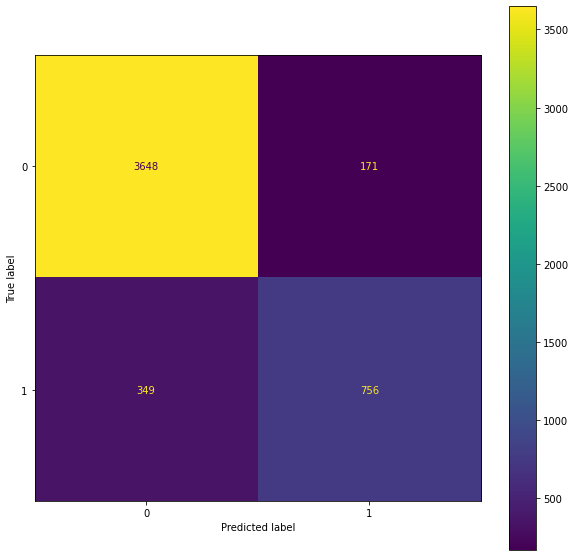

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred), display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

**Conclusões**: 

É possível observar que o modelo performou melhor na identificação de jogos que não vendem mais no Japão, com valores de prescisão e recall mais elevados (0.91 e 0.95). Para classificar jogos que agradavam mais o publico japonês e não faziam tanto sucesso no restante do mundo o modelo não teve tão bom desempenho (prescisão 0.81 e recall 0.68).


# Conclusão

Conseguimos observar que a industria de jogos é cheia de nichos, com vieses tanto entre plataformas quanto entre regiões, como vimos nos testes de hipótese nas perguntas 1 e 3. 

Conseguimos observar também dois comportamentos interessantes: 
* as vendas por ano de lançamento de cada genero passa por ciclos de picos e baixas, pressumivelmente porque o lançamento de jogos muito populares tende a ofuscar lançamentos menores em anos subsequentes.
* há tendencias regionais que ocorrem momentaneamente e depois podem se normalizar, voltando a um estado mais condizente com as demais regiões (mesmo que ainda enviesado). Por exemplo, o pico de vendas de ação entre os jogos lançados por volta de 2006 ocorre exclusivamente fora do mercado europeu, americano e japones

É possível que um dos motivos para que o modelo de classificação não tenha desempenhado tão bem ao identificar jogos com vendas majoritárias no Japão seja a quantidade pequena desses registros na base, apenas 3798. Ao treinar o mesmo modelo em uma base maior, esperaria-se uma melhora nos resultados 